In [7]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt
import collections as cl

In [3]:
my_data = np.genfromtxt('mitte-center-network.txt', skip_header = 9)
mylist = ['Init_node','Term_node','Capacity','Length','Free_Flow','Time','B','Power','Speed_limit','Toll','Type']

In [11]:
df = pd.DataFrame(my_data, columns= mylist)
df[:10]

,Init_node,Term_node,Capacity,Length,Free_Flow,Time,B,Power,Speed_limit,Toll,Type
0,1.0,303.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
1,1.0,304.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
2,1.0,306.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
3,1.0,307.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
4,2.0,253.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
5,2.0,255.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
6,2.0,256.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
7,2.0,272.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
8,3.0,258.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN
9,3.0,259.0,999999.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN


Init_node
1.0 398.0
Counter({79.0: 5, 129.0: 5, 253.0: 5, 315.0: 5, 327.0: 5, 331.0: 5, 1.0: 4, 2.0: 4, 3.0: 4, 4.0: 4, 5.0: 4, 6.0: 4, 7.0: 4, 8.0: 4, 9.0: 4, 10.0: 4, 11.0: 4, 12.0: 4, 13.0: 4, 14.0: 4, 15.0: 4, 16.0: 4, 17.0: 4, 18.0: 4, 19.0: 4, 20.0: 4, 21.0: 4, 22.0: 4, 23.0: 4, 24.0: 4, 25.0: 4, 26.0: 4, 27.0: 4, 28.0: 4, 29.0: 4, 30.0: 4, 31.0: 4, 32.0: 4, 33.0: 4, 34.0: 4, 35.0: 4, 36.0: 4, 51.0: 4, 63.0: 4, 70.0: 4, 75.0: 4, 78.0: 4, 100.0: 4, 111.0: 4, 122.0: 4, 140.0: 4, 203.0: 4, 210.0: 4, 221.0: 4, 223.0: 4, 226.0: 4, 232.0: 4, 242.0: 4, 247.0: 4, 268.0: 4, 286.0: 4, 287.0: 4, 290.0: 4, 295.0: 4, 304.0: 4, 312.0: 4, 314.0: 4, 334.0: 4, 335.0: 4, 353.0: 4, 375.0: 4, 383.0: 4, 46.0: 3, 54.0: 3, 80.0: 3, 81.0: 3, 83.0: 3, 85.0: 3, 86.0: 3, 87.0: 3, 91.0: 3, 94.0: 3, 103.0: 3, 113.0: 3, 114.0: 3, 115.0: 3, 117.0: 3, 118.0: 3, 120.0: 3, 130.0: 3, 135.0: 3, 149.0: 3, 150.0: 3, 156.0: 3, 158.0: 3, 168.0: 3, 170.0: 3, 176.0: 3, 220.0: 3, 222.0: 3, 228.0: 3, 231.0: 3, 239.0: 3, 24

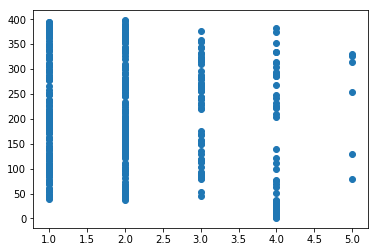



Term_node
1.0 398.0
Counter({287.0: 6, 253.0: 5, 226.0: 5, 129.0: 5, 315.0: 5, 331.0: 5, 79.0: 5, 304.0: 4, 353.0: 4, 223.0: 4, 295.0: 4, 51.0: 4, 140.0: 4, 63.0: 4, 203.0: 4, 75.0: 4, 70.0: 4, 312.0: 4, 375.0: 4, 286.0: 4, 383.0: 4, 334.0: 4, 327.0: 4, 78.0: 4, 268.0: 4, 247.0: 4, 33.0: 4, 113.0: 4, 29.0: 4, 7.0: 4, 11.0: 4, 27.0: 4, 100.0: 4, 314.0: 4, 17.0: 4, 18.0: 4, 16.0: 4, 32.0: 4, 344.0: 4, 34.0: 4, 12.0: 4, 111.0: 4, 14.0: 4, 30.0: 4, 10.0: 4, 35.0: 4, 9.0: 4, 167.0: 4, 15.0: 4, 13.0: 4, 6.0: 4, 28.0: 4, 20.0: 4, 290.0: 4, 23.0: 4, 4.0: 4, 22.0: 4, 242.0: 4, 36.0: 4, 2.0: 4, 5.0: 4, 3.0: 4, 31.0: 4, 19.0: 4, 1.0: 4, 21.0: 4, 25.0: 4, 24.0: 4, 26.0: 4, 8.0: 4, 255.0: 3, 256.0: 3, 272.0: 3, 258.0: 3, 261.0: 3, 231.0: 3, 232.0: 3, 263.0: 3, 359.0: 3, 360.0: 3, 158.0: 3, 168.0: 3, 176.0: 3, 279.0: 3, 120.0: 3, 130.0: 3, 241.0: 3, 317.0: 3, 270.0: 3, 217.0: 3, 220.0: 3, 221.0: 3, 228.0: 3, 285.0: 3, 222.0: 3, 332.0: 3, 335.0: 3, 280.0: 3, 210.0: 3, 46.0: 3, 156.0: 3, 267.0: 3, 2

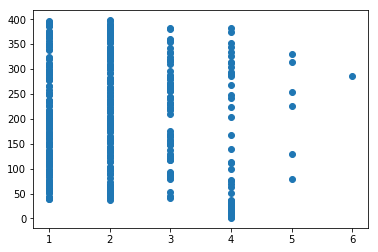



Capacity
600.0 999999.0
Counter({999999.0: 288, 900.0: 194, 2400.0: 157, 600.0: 124, 2800.0: 108})


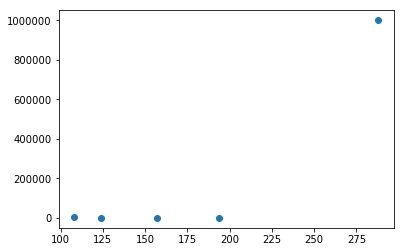



Length
0.0 599.0
Counter({0.0: 288, 100.0: 8, 105.0: 7, 31.0: 7, 165.0: 7, 128.0: 7, 37.0: 6, 43.0: 6, 90.0: 6, 16.0: 6, 22.0: 6, 102.0: 6, 32.0: 6, 23.0: 5, 198.0: 5, 38.0: 5, 87.0: 5, 29.0: 5, 25.0: 5, 154.0: 5, 219.0: 5, 113.0: 5, 44.0: 4, 39.0: 4, 30.0: 4, 114.0: 4, 103.0: 4, 161.0: 4, 132.0: 4, 19.0: 4, 178.0: 4, 137.0: 4, 236.0: 4, 66.0: 4, 96.0: 4, 131.0: 4, 75.0: 4, 74.0: 4, 53.0: 4, 104.0: 4, 107.0: 4, 180.0: 4, 118.0: 4, 24.0: 3, 196.0: 3, 320.0: 3, 51.0: 3, 64.0: 3, 106.0: 3, 77.0: 3, 85.0: 3, 34.0: 3, 174.0: 3, 86.0: 3, 192.0: 3, 72.0: 3, 201.0: 3, 78.0: 3, 202.0: 3, 40.0: 3, 172.0: 3, 256.0: 3, 156.0: 3, 374.0: 3, 93.0: 3, 109.0: 3, 10.0: 3, 73.0: 3, 324.0: 3, 218.0: 3, 69.0: 3, 94.0: 3, 144.0: 3, 60.0: 3, 84.0: 3, 119.0: 3, 175.0: 3, 203.0: 3, 70.0: 3, 261.0: 3, 17.0: 3, 1.0: 2, 240.0: 2, 82.0: 2, 126.0: 2, 194.0: 2, 125.0: 2, 46.0: 2, 48.0: 2, 301.0: 2, 339.0: 2, 262.0: 2, 348.0: 2, 277.0: 2, 197.0: 2, 130.0: 2, 213.0: 2, 124.0: 2, 83.0: 2, 274.0: 2, 191.0: 2, 61.0: 2,

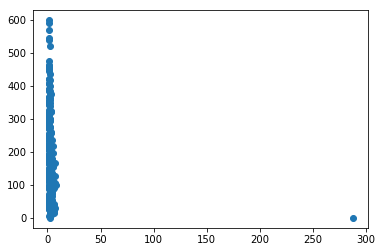



Free_Flow
0.0 41.0
Counter({0.0: 288, 0.666667: 30, 1.333333: 30, 4.0: 30, 1.0: 26, 1.666667: 23, 2.333333: 23, 2.666667: 22, 2.0: 20, 4.666667: 19, 0.333333: 16, 3.0: 16, 4.333333: 16, 3.666667: 14, 5.333333: 13, 6.666667: 13, 8.666667: 12, 3.333333: 11, 7.0: 11, 8.333333: 11, 6.0: 10, 5.0: 10, 9.0: 10, 11.333333: 10, 11.0: 10, 5.666667: 10, 8.0: 9, 7.666667: 8, 9.666667: 8, 10.666667: 7, 7.333333: 7, 10.0: 7, 13.333333: 7, 9.333333: 6, 10.333333: 6, 15.666667: 6, 12.0: 5, 14.666667: 5, 15.333333: 5, 14.0: 5, 12.666667: 5, 18.333333: 4, 6.333333: 4, 12.333333: 4, 19.0: 4, 13.666667: 4, 21.333333: 4, 19.333333: 3, 16.0: 3, 13.0: 3, 14.333333: 3, 15.0: 2, 17.0: 2, 11.666667: 2, 16.333333: 2, 16.666667: 2, 23.0: 2, 20.333333: 2, 21.0: 2, 18.0: 2, 18.666667: 2, 30.333333: 1, 17.333333: 1, 27.333333: 1, 19.666667: 1, 30.666667: 1, 28.333333: 1, 24.0: 1, 24.333333: 1, 22.666667: 1, 25.0: 1, 41.0: 1, 28.666667: 1, 40.333333: 1, 17.666667: 1, 26.0: 1})


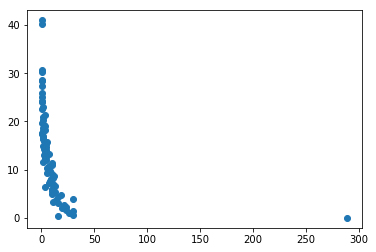



Time
0.0 1.0
Counter({1.0: 583, 0.0: 288})


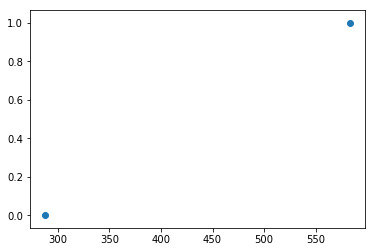



B
4.0 4.0
Counter({4.0: 871})


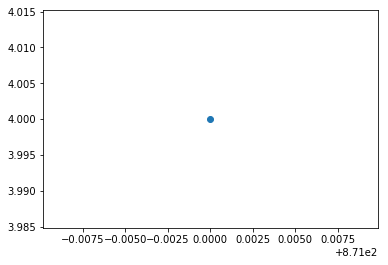



Power
0.0 0.0
Counter({0.0: 871})


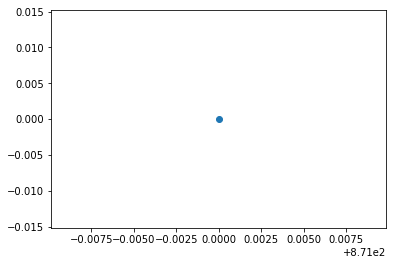



Speed_limit
0.0 0.0
Counter({0.0: 871})


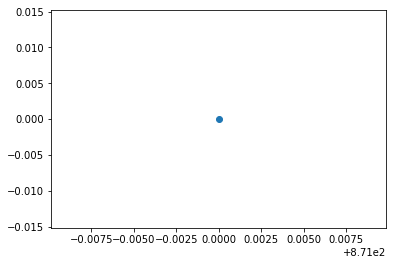



Toll
0.0 1.0
Counter({1.0: 583, 0.0: 288})


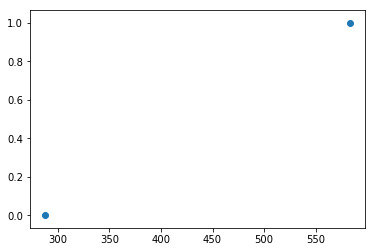



Type
nan nan
Counter({nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

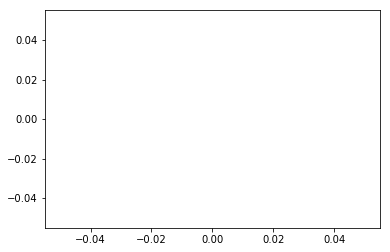

In [21]:
for k in mylist:
    print(k)
    print(min(list(cl.Counter(df[k]).keys())), max(list(cl.Counter(df[k]).keys())))
    print(cl.Counter(df[k]))
    
    plt.scatter(list(cl.Counter(df[k]).values()), list(cl.Counter(df[k]).keys()))
    plt.show()
    print('\n')